In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
df.shape

(10999, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('ID', axis=1, inplace=True)

# EDA

## Heat Map

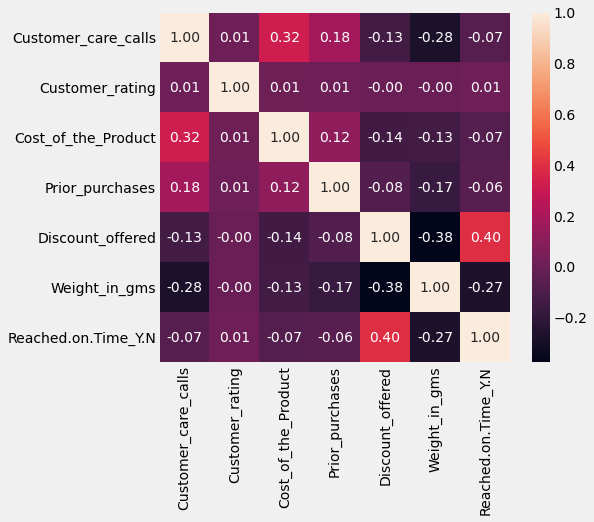

In [9]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.show()

**Notes**
- High positive correlation between discount and reached on time (40%)
- Negative correlation between weight and reached on time (-27%)
- High negative correlation between discount and weight (-38%)
- negative correlation between weight and customer care calls (-28%)
- Positive correlation between cost of the product and customer care calls (32%)
- **There's no very high correlation between all feature**

## Numeric to Numeric

<Figure size 432x432 with 0 Axes>

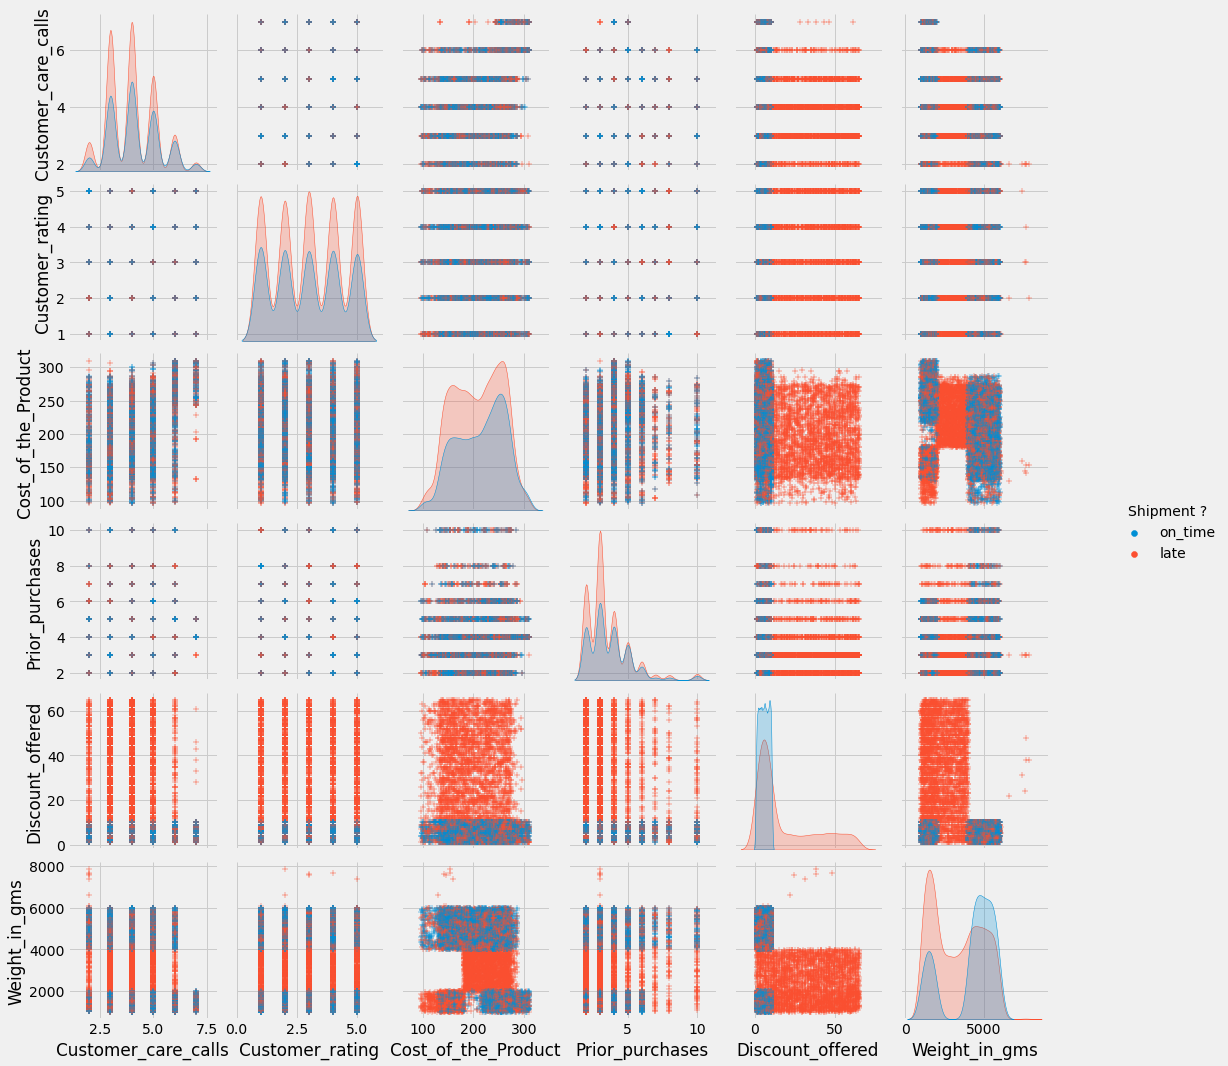

In [10]:
plt.figure(figsize=(6, 6));
p = sns.pairplot(df, markers = '+', diag_kind = 'kde', hue = 'Reached.on.Time_Y.N');
# title
new_title = 'Shipment ?'
p._legend.set_title(new_title);

# replace labels
new_labels = ['on_time', 'late']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l);
    
plt.show();

**Notes**
- Shipment tends to deliver on time when discount under 10%
- weight products above 2kg and below 4kg is always late

## Categorical to Numeric

In [11]:
df.columns = df.columns.str.lower()

# Categorical data
categorical = ['warehouse_block','mode_of_shipment','product_importance', 'gender', 'reached.on.time_y.n', 'customer_rating']
# Numerical data
numeric = ['customer_care_calls', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms']

**Warehouse_block**

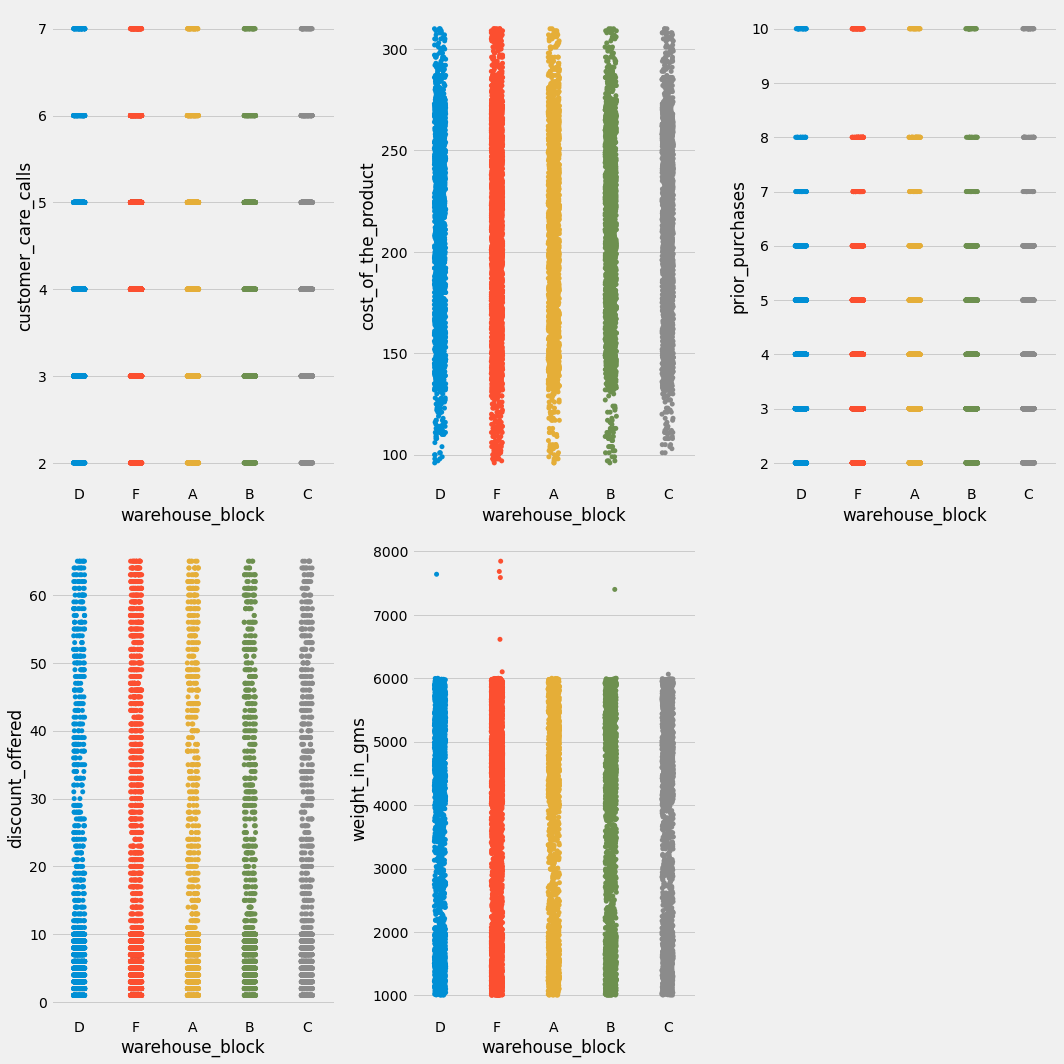

In [12]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numeric)):
    ax = fig.add_subplot(2, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='warehouse_block', y=numeric[i])
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1)

    plt.close(len(numeric) + 1)

**Shipment**

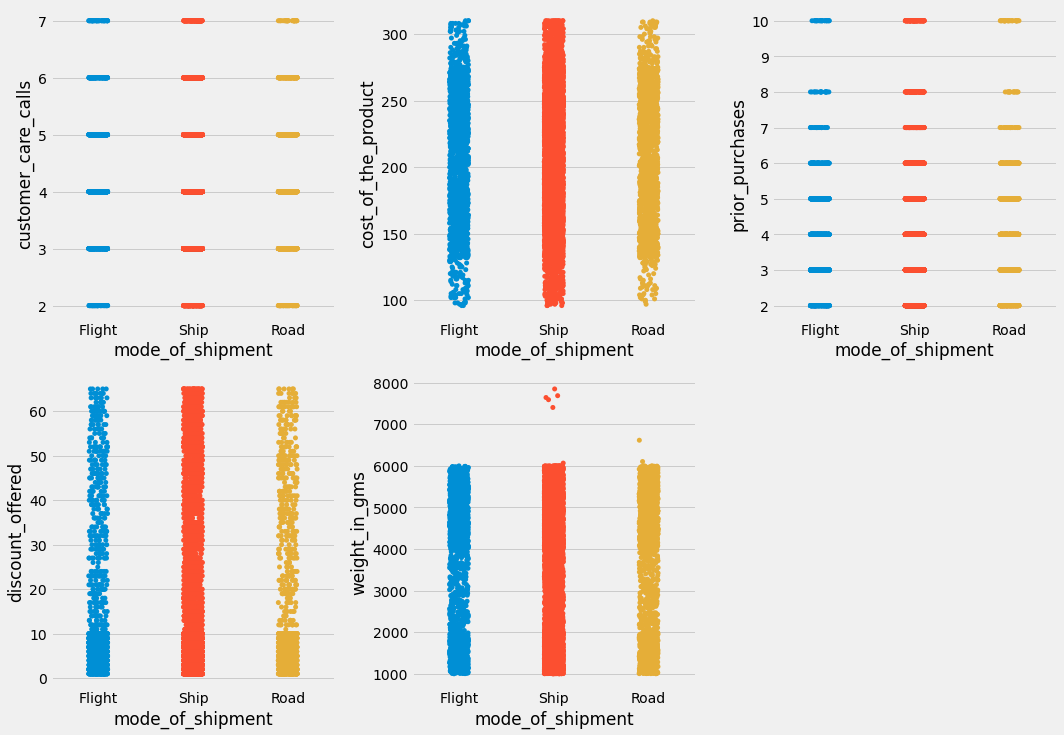

In [13]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numeric)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='mode_of_shipment', y=numeric[i])
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1)

    plt.close(len(numeric) + 1)

**Product Importance**

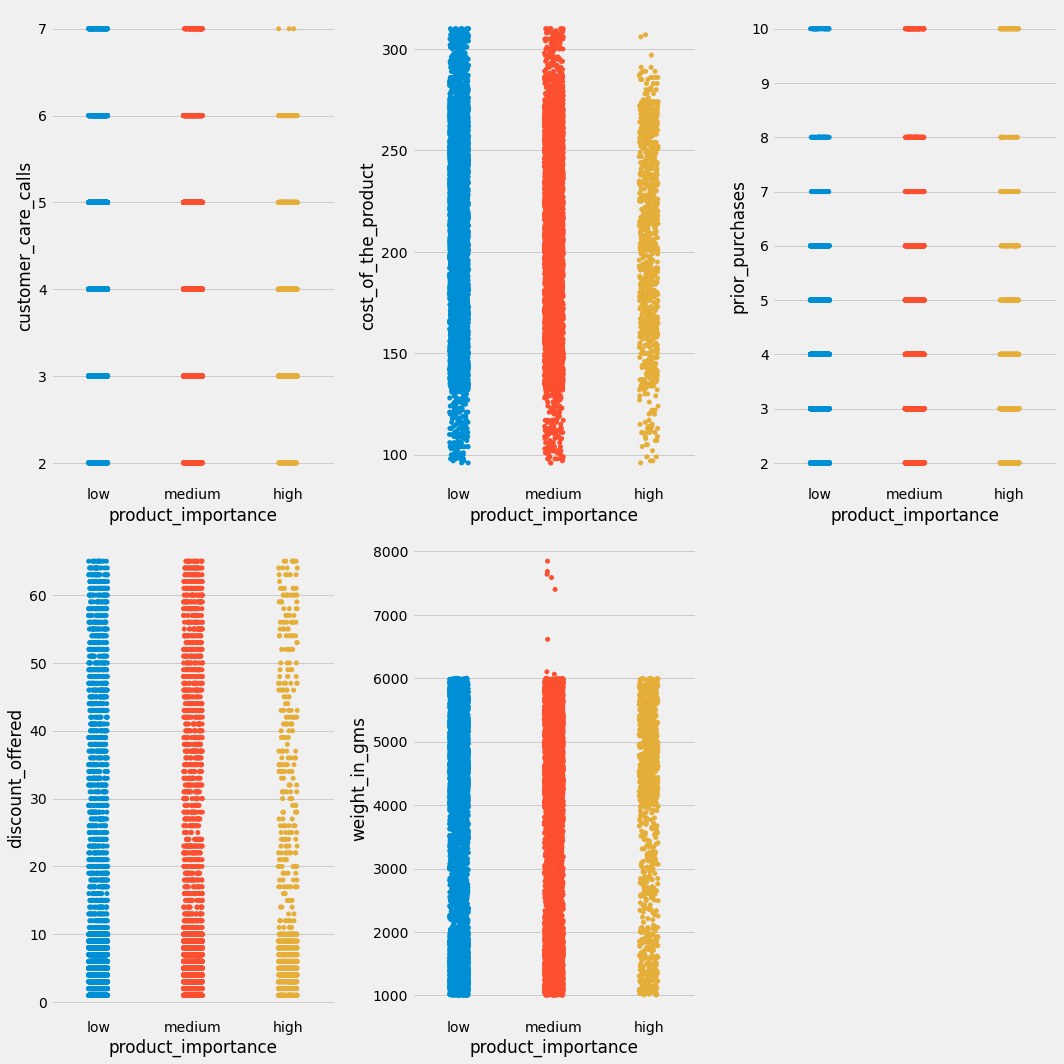

In [14]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numeric)):
    ax = fig.add_subplot(2, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='product_importance', y=numeric[i])
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1)

    plt.close(len(numeric) + 1)

**Gender**

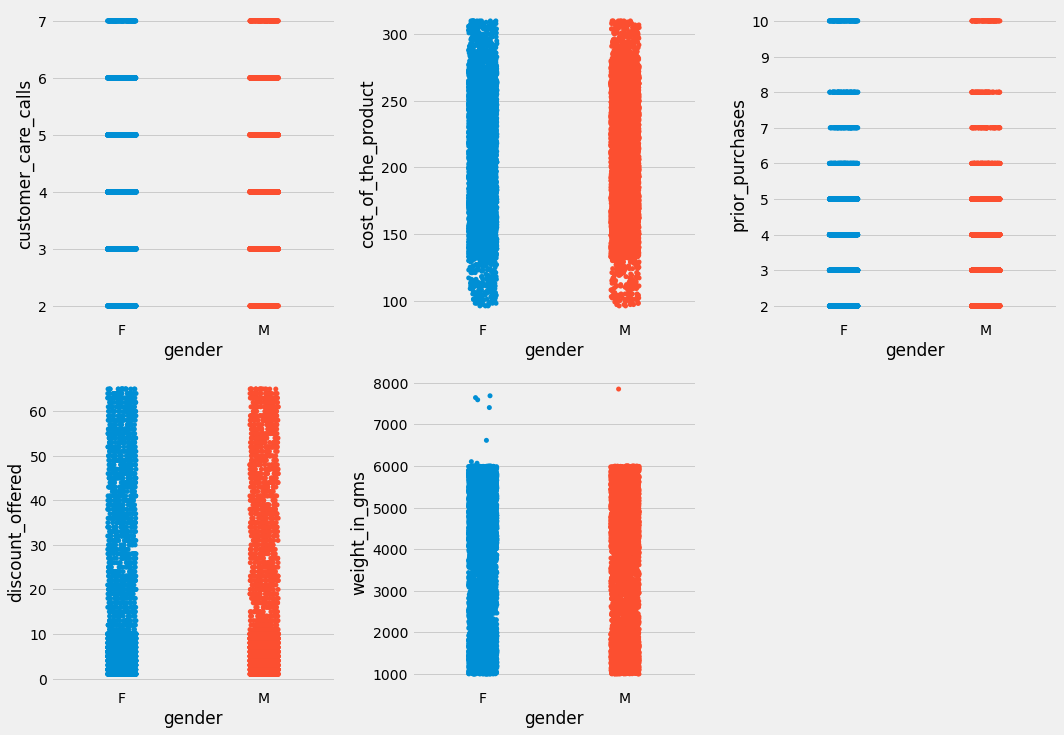

In [15]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numeric)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='gender', y=numeric[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(numeric) + 1)

## Relation Feature to Target

**Warehouse Block to Target**

In [16]:
df.columns = df.columns.str.lower()

# Categorical data
categorical = ['warehouse_block','mode_of_shipment','product_importance', 'gender', 'reached.on.time_y.n', 'customer_rating']
# Numerical data
numeric = ['customer_care_calls', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms']

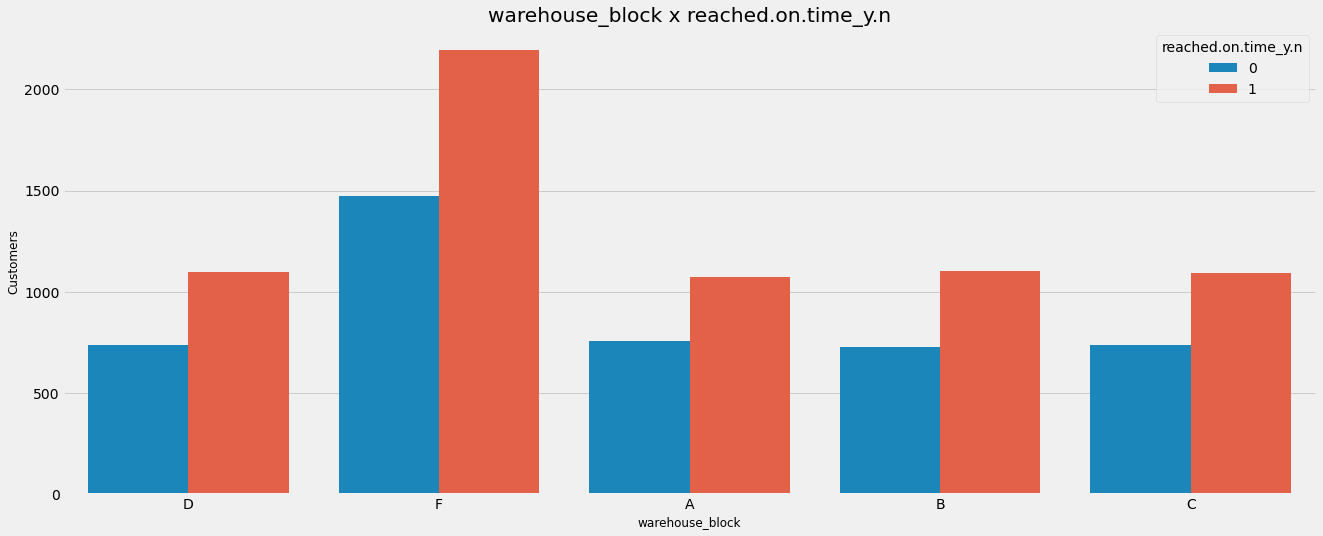

<Figure size 1440x576 with 0 Axes>

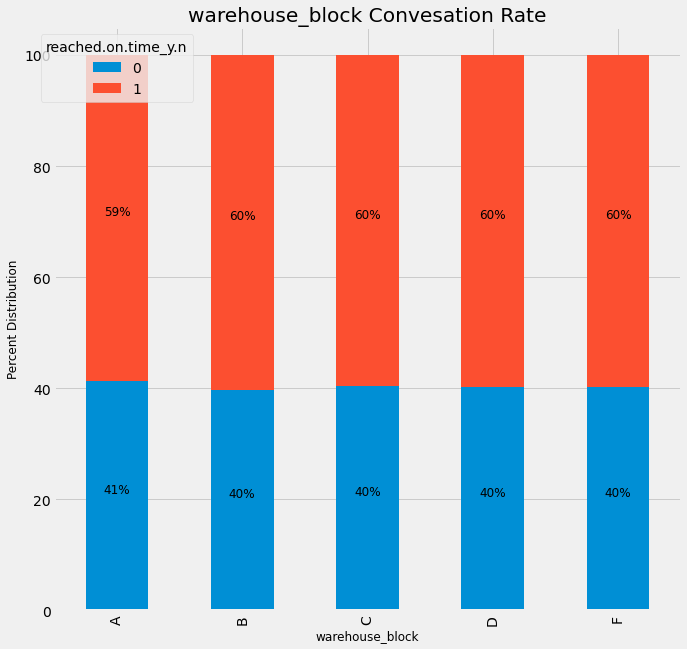

In [32]:
### warehouse_block x reached.on.time_y.n (Count)
plt.figure(figsize=(20,8))
sns.countplot(x= df['warehouse_block'], data=df, hue='reached.on.time_y.n')
plt.xlabel('warehouse_block',fontsize = 12)
plt.ylabel('Customers',fontsize = 12)
plt.title("warehouse_block x reached.on.time_y.n")

### warehouse_block Convesation Rate (%)
plt.figure(figsize=(20,8))

pal = ["royalblue", "dodgerblue"]
ax= pd.crosstab(df['warehouse_block'], df['reached.on.time_y.n']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="reached.on.time_y.n")

plt.xlabel('warehouse_block',fontsize = 12)
plt.ylabel('Percent Distribution',fontsize = 12)
plt.title("warehouse_block Convesation Rate")
locs, labels = plt.xticks() #rotate label x axis
plt.setp(labels, rotation=90)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom',
             fontsize = 12)
plt.show()

**Gender to Target**

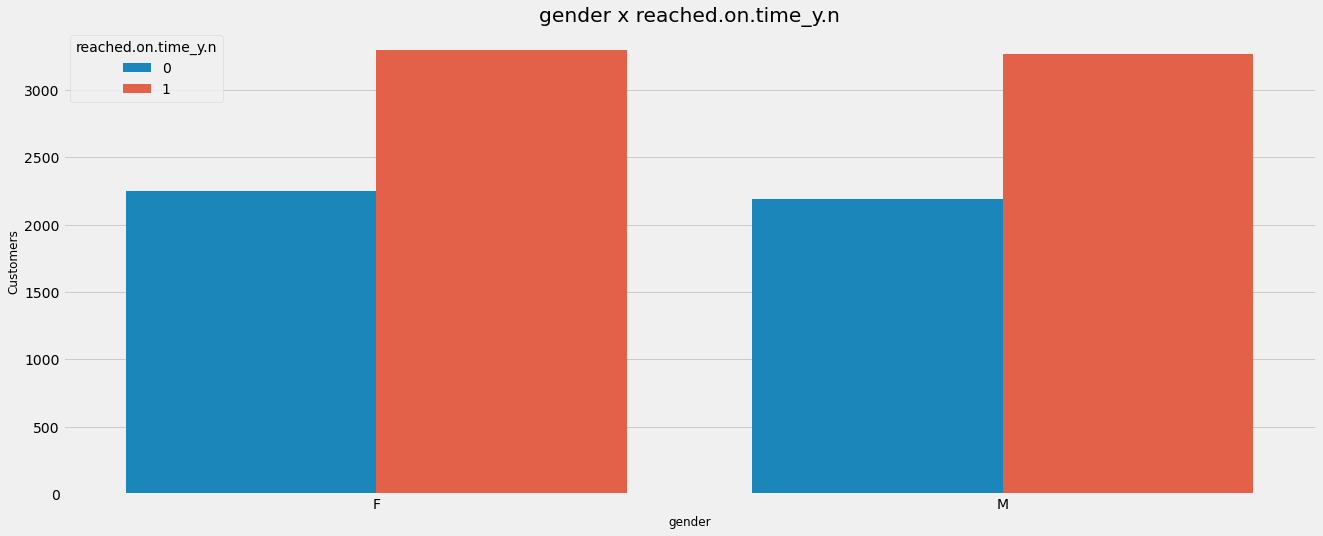

<Figure size 1440x576 with 0 Axes>

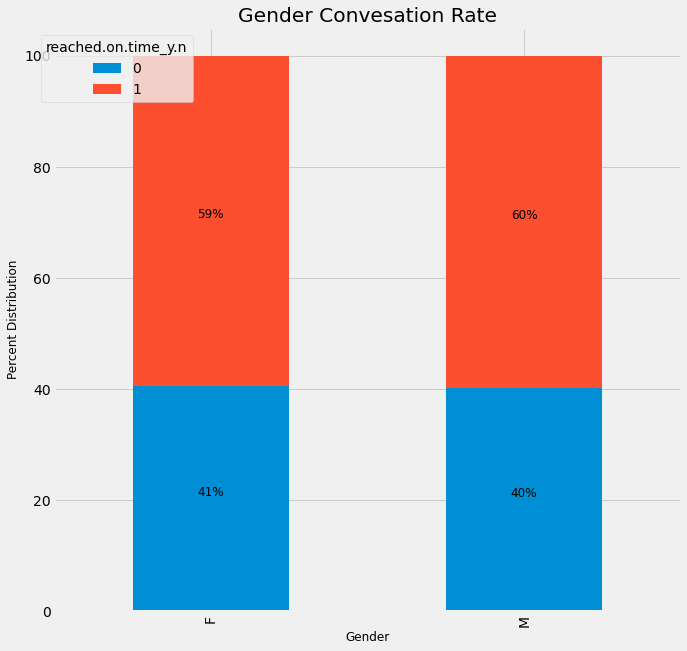

In [18]:
### gender x reached.on.time_y.n (Count)
plt.figure(figsize=(20,8))
sns.countplot(x= df['gender'], data=df, hue='reached.on.time_y.n')
plt.xlabel('gender',fontsize = 12)
plt.ylabel('Customers',fontsize = 12)
plt.title("gender x reached.on.time_y.n")

### gender Convesation Rate (%)
plt.figure(figsize=(20,8))

pal = ["royalblue", "dodgerblue"]
ax= pd.crosstab(df['gender'], df['reached.on.time_y.n']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="reached.on.time_y.n")

plt.xlabel('Gender',fontsize = 12)
plt.ylabel('Percent Distribution',fontsize = 12)
plt.title("Gender Convesation Rate")
locs, labels = plt.xticks() #rotate label x axis
plt.setp(labels, rotation=90)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom',
             fontsize = 12)
plt.show()

**Mode of Shipment to target**

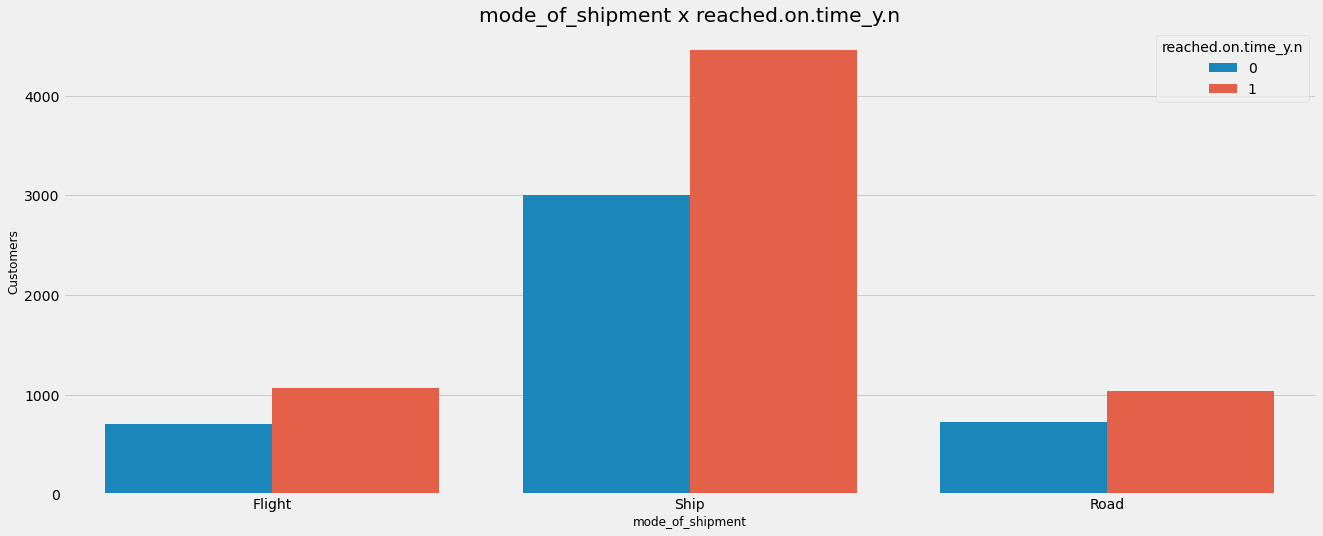

<Figure size 1440x576 with 0 Axes>

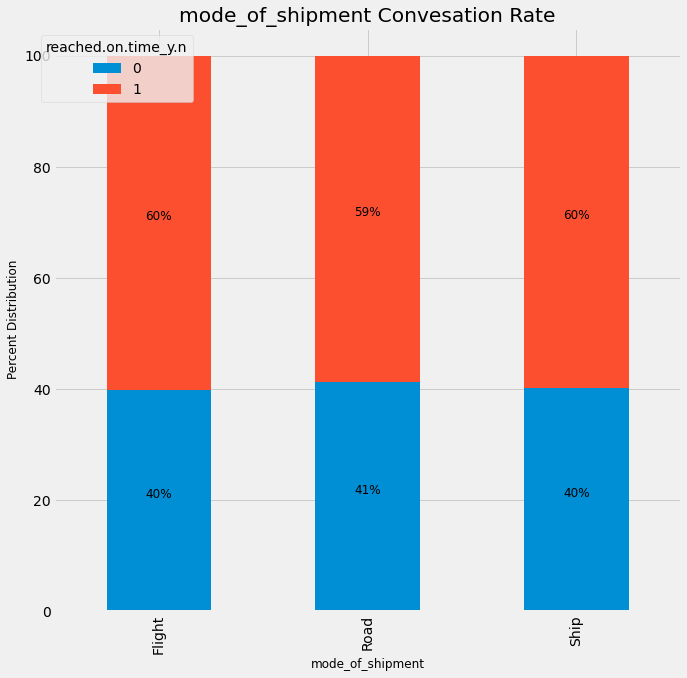

In [19]:
### mode_of_shipment x reached.on.time_y.n (Count)
plt.figure(figsize=(20,8))
sns.countplot(x= df['mode_of_shipment'], data=df, hue='reached.on.time_y.n')
plt.xlabel('mode_of_shipment',fontsize = 12)
plt.ylabel('Customers',fontsize = 12)
plt.title("mode_of_shipment x reached.on.time_y.n")

### mode_of_shipment Convesation Rate (%)
plt.figure(figsize=(20,8))

pal = ["royalblue", "dodgerblue"]
ax= pd.crosstab(df['mode_of_shipment'], df['reached.on.time_y.n']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="reached.on.time_y.n")

plt.xlabel('mode_of_shipment',fontsize = 12)
plt.ylabel('Percent Distribution',fontsize = 12)
plt.title("mode_of_shipment Convesation Rate")
locs, labels = plt.xticks() #rotate label x axis
plt.setp(labels, rotation=90)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom',
             fontsize = 12)
plt.show()

**customer care calls to target**

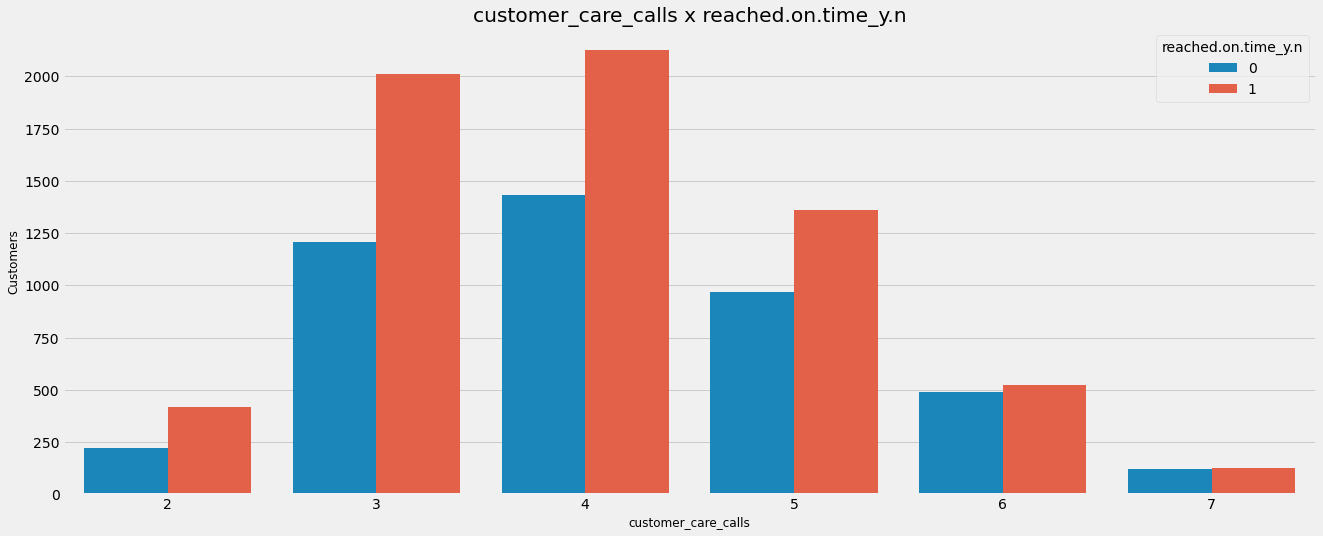

<Figure size 1440x576 with 0 Axes>

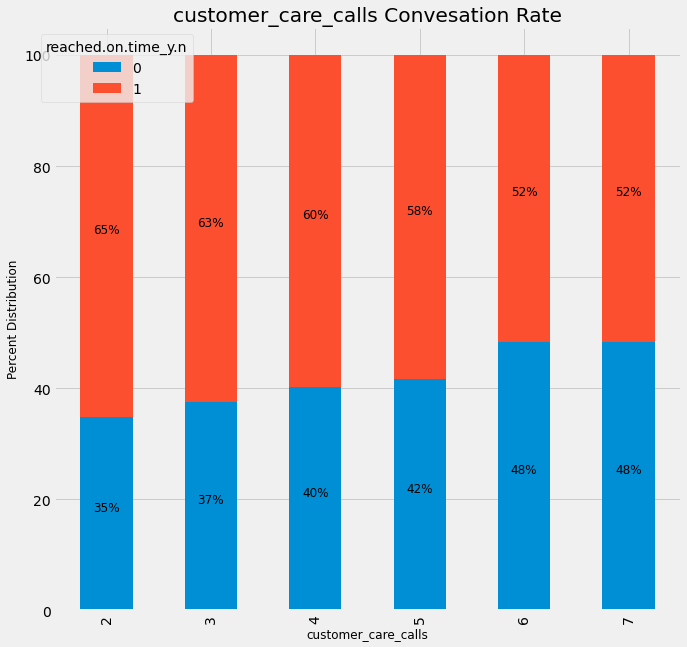

In [20]:
### customer_care_calls x reached.on.time_y.n (Count)
plt.figure(figsize=(20,8))
sns.countplot(x= df['customer_care_calls'], data=df, hue='reached.on.time_y.n')
plt.xlabel('customer_care_calls',fontsize = 12)
plt.ylabel('Customers',fontsize = 12)
plt.title("customer_care_calls x reached.on.time_y.n")

### customer_care_calls Convesation Rate (%)
plt.figure(figsize=(20,8))

pal = ["royalblue", "dodgerblue"]
ax= pd.crosstab(df['customer_care_calls'], df['reached.on.time_y.n']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="reached.on.time_y.n")

plt.xlabel('customer_care_calls',fontsize = 12)
plt.ylabel('Percent Distribution',fontsize = 12)
plt.title("customer_care_calls Convesation Rate")
locs, labels = plt.xticks() #rotate label x axis
plt.setp(labels, rotation=90)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom',
             fontsize = 12)
plt.show()

**Product Importance to target**

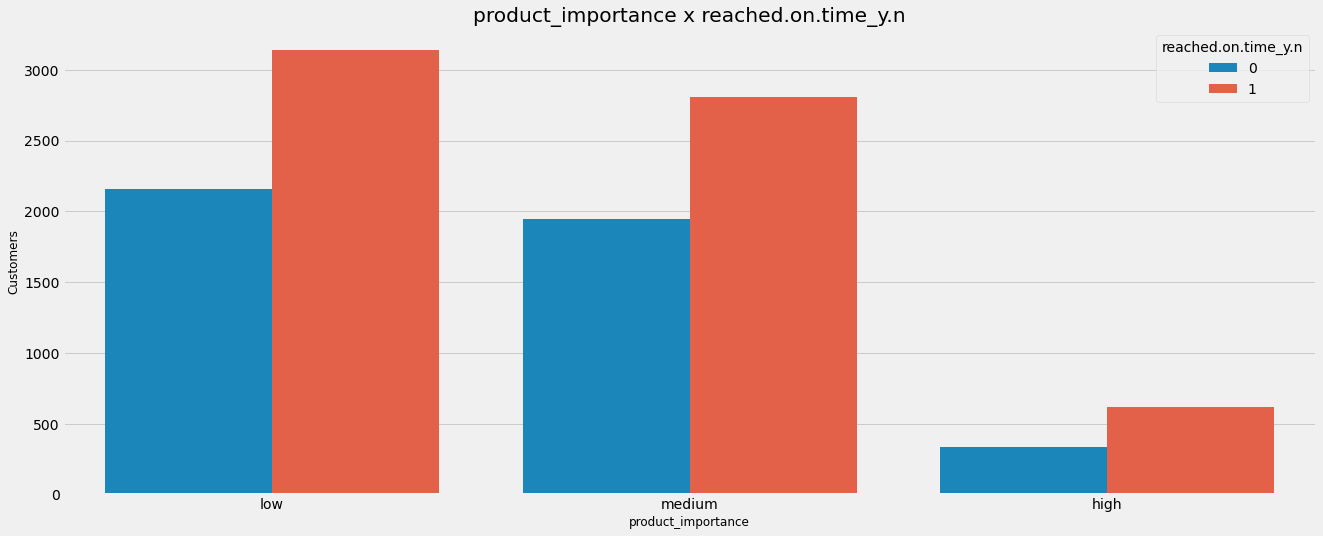

<Figure size 1440x576 with 0 Axes>

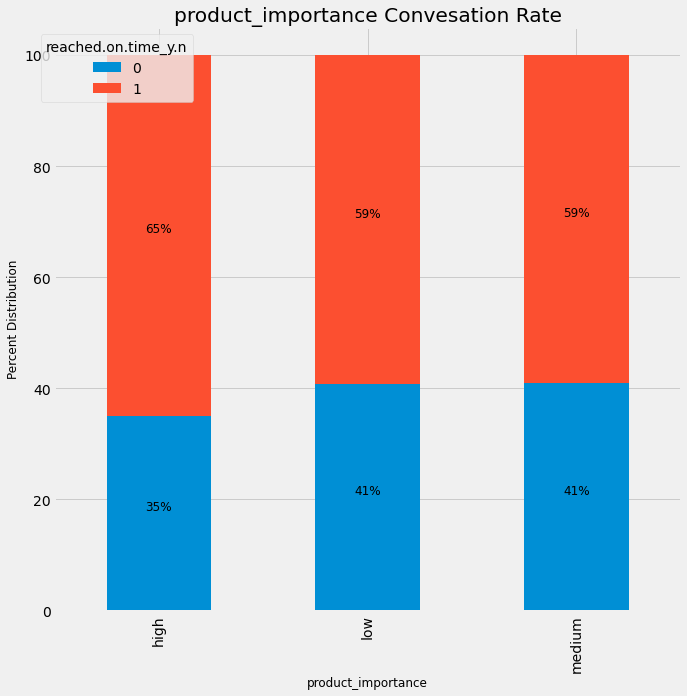

In [21]:
### product_importance x reached.on.time_y.n (Count)
plt.figure(figsize=(20,8))
sns.countplot(x= df['product_importance'], data=df, hue='reached.on.time_y.n')
plt.xlabel('product_importance',fontsize = 12)
plt.ylabel('Customers',fontsize = 12)
plt.title("product_importance x reached.on.time_y.n")

### product_importance Convesation Rate (%)
plt.figure(figsize=(20,8))

pal = ["royalblue", "dodgerblue"]
ax= pd.crosstab(df['product_importance'], df['reached.on.time_y.n']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="reached.on.time_y.n")

plt.xlabel('product_importance',fontsize = 12)
plt.ylabel('Percent Distribution',fontsize = 12)
plt.title("product_importance Convesation Rate")
locs, labels = plt.xticks() #rotate label x axis
plt.setp(labels, rotation=90)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom',
             fontsize = 12)
plt.show()

**Customer Ratings to target**

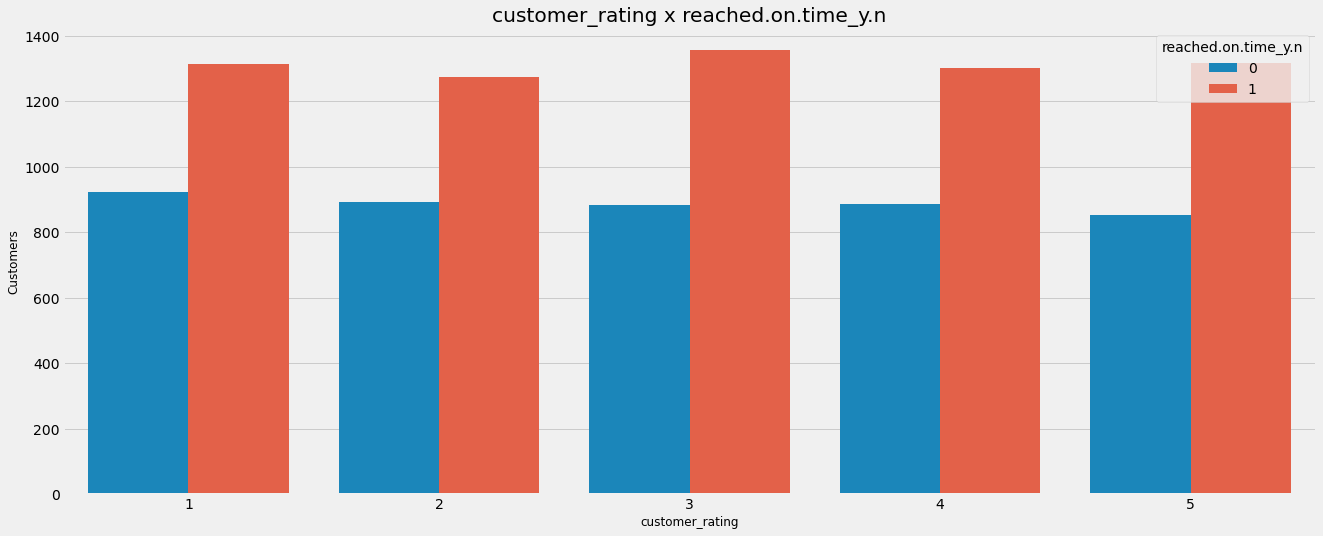

<Figure size 1440x576 with 0 Axes>

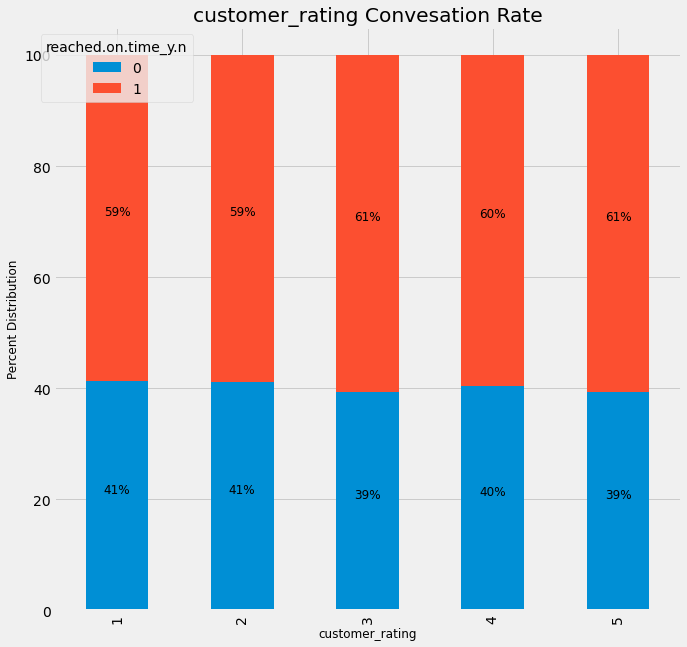

In [22]:
### customer_rating x reached.on.time_y.n (Count)
plt.figure(figsize=(20,8))
sns.countplot(x= df['customer_rating'], data=df, hue='reached.on.time_y.n')
plt.xlabel('customer_rating',fontsize = 12)
plt.ylabel('Customers',fontsize = 12)
plt.title("customer_rating x reached.on.time_y.n")

### product_importance Convesation Rate (%)
plt.figure(figsize=(20,8))

pal = ["royalblue", "dodgerblue"]
ax= pd.crosstab(df['customer_rating'], df['reached.on.time_y.n']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="reached.on.time_y.n")

plt.xlabel('customer_rating',fontsize = 12)
plt.ylabel('Percent Distribution',fontsize = 12)
plt.title("customer_rating Convesation Rate")
locs, labels = plt.xticks() #rotate label x axis
plt.setp(labels, rotation=90)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom',
             fontsize = 12)
plt.show()

**Prior Purchases to target**

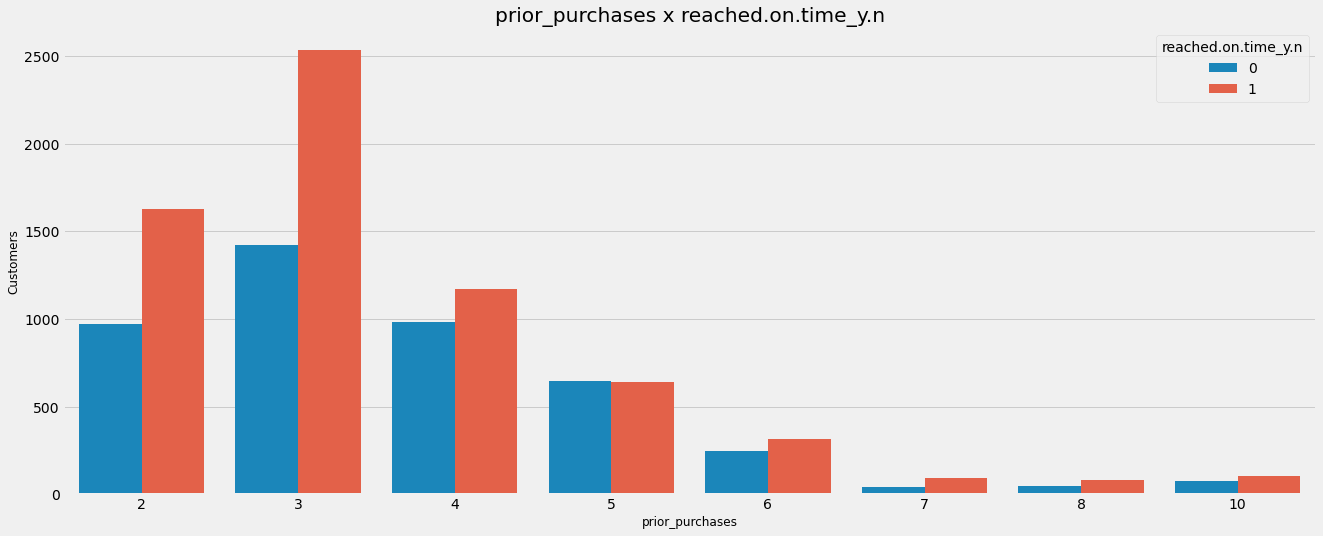

<Figure size 1440x576 with 0 Axes>

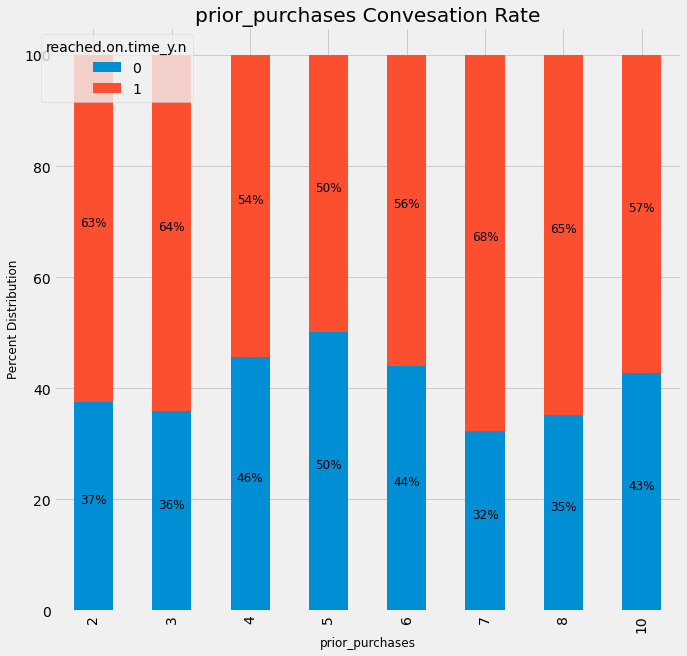

In [23]:
### prior_purchases x reached.on.time_y.n (Count)
plt.figure(figsize=(20,8))
sns.countplot(x= df['prior_purchases'], data=df, hue='reached.on.time_y.n')
plt.xlabel('prior_purchases',fontsize = 12)
plt.ylabel('Customers',fontsize = 12)
plt.title("prior_purchases x reached.on.time_y.n")

### product_importance Convesation Rate (%)
plt.figure(figsize=(20,8))

pal = ["royalblue", "dodgerblue"]
ax= pd.crosstab(df['prior_purchases'], df['reached.on.time_y.n']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="reached.on.time_y.n")

plt.xlabel('prior_purchases',fontsize = 12)
plt.ylabel('Percent Distribution',fontsize = 12)
plt.title("prior_purchases Convesation Rate")
locs, labels = plt.xticks() #rotate label x axis
plt.setp(labels, rotation=90)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom',
             fontsize = 12)
plt.show()

**cost of the product to target**

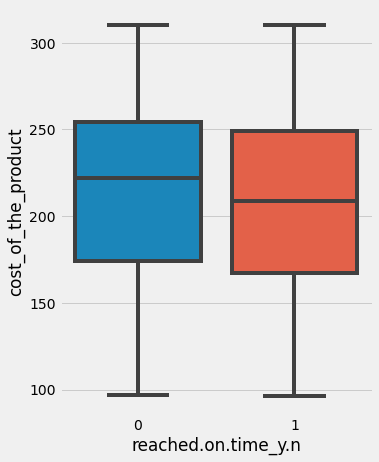

In [24]:
plt.figure(figsize=(5, 7))
sns.boxplot(data = df, y = 'cost_of_the_product',x = 'reached.on.time_y.n')
plt.show();

**discount offered**

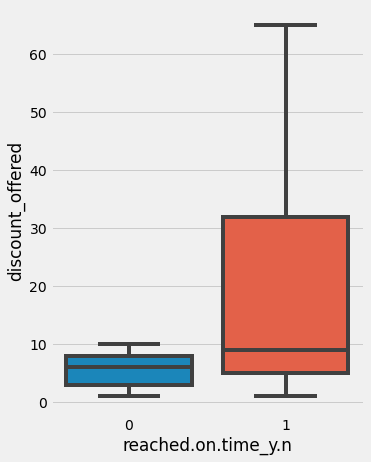

In [25]:
plt.figure(figsize=(5, 7))
sns.boxplot(data = df, y = 'discount_offered',x = 'reached.on.time_y.n')
plt.show();

**Weights in Grams**

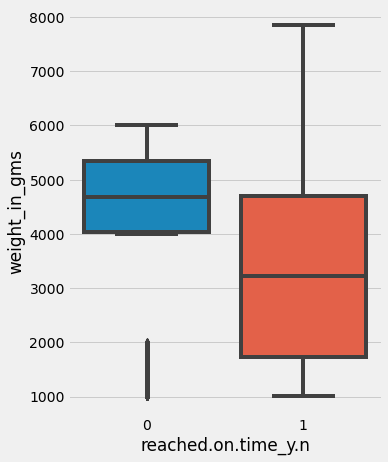

In [26]:
plt.figure(figsize=(5, 7))
sns.boxplot(data = df, y = 'weight_in_gms',x = 'reached.on.time_y.n')
plt.show();

## Target

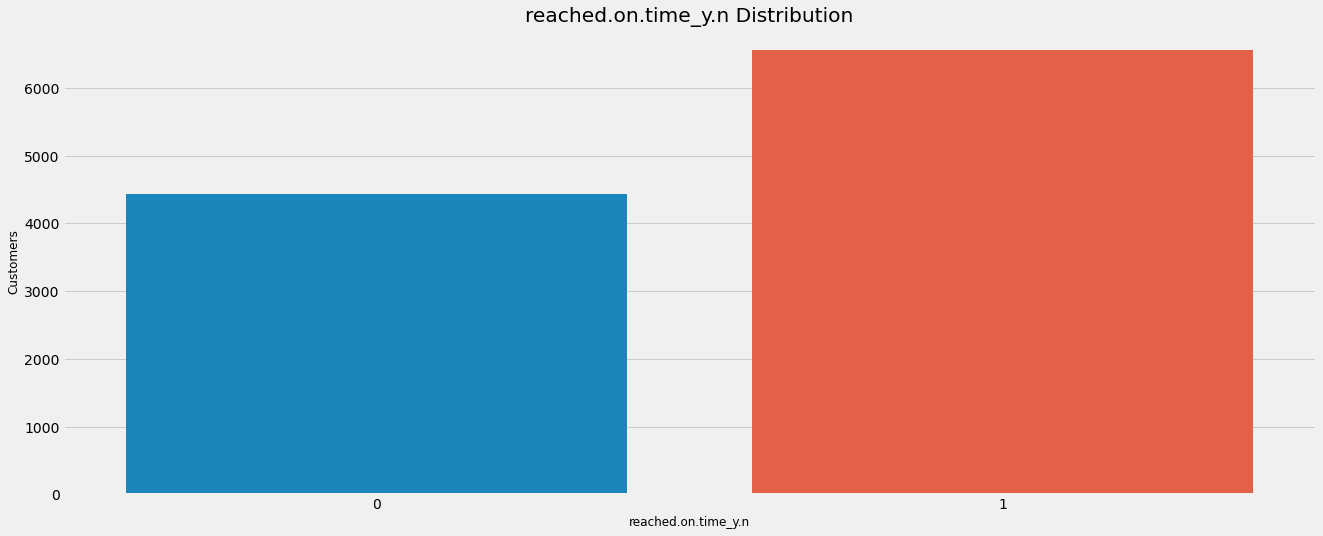

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(x= df['reached.on.time_y.n'], data=df)
plt.xlabel('reached.on.time_y.n',fontsize = 12)
plt.ylabel('Customers',fontsize = 12)
plt.title("reached.on.time_y.n Distribution")
plt.show();